In [8]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving INvideos.csv to INvideos (1).csv


Saving IN_category_id.json to IN_category_id.json


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Set visualization style
sns.set(style="whitegrid")


In [25]:
print("📄 Loading INvideos.csv...")

df = pd.read_csv('INvideos.csv')

print("Data loaded successfully. Showing first 5 rows:")
print(df.head())


📄 Loading INvideos.csv...
✅ Data loaded successfully. Showing first 5 rows:
      video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   
3           23  2017-11-12T07:08:48.000Z   
4           24  2017-11-13T01:14:16.000Z   

                           

In [26]:
print("Column names in the dataset:")
print(df.columns.tolist())


🧾 Column names in the dataset:
['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']


In [27]:
print("Loading category names from IN_category_id.json...")

# Load JSON
with open('IN_category_id.json') as f:
    category_data = json.load(f)

# Create dictionary
categories = category_data['items']
category_mapping = {int(cat['id']): cat['snippet']['title'] for cat in categories}

# Map to DataFrame
df['category_name'] = df['category_id'].astype(int).map(category_mapping)

print("Mapped 'category_id' to 'category_name'. Sample output:")
print(df[['category_id', 'category_name']].head())


🔁 Loading category names from IN_category_id.json...
✅ Mapped 'category_id' to 'category_name'. Sample output:
   category_id     category_name
0            1  Film & Animation
1           25   News & Politics
2           24     Entertainment
3           23            Comedy
4           24     Entertainment


In [28]:
print("Creating NumPy arrays from 'views', 'likes', and 'dislikes'...")

views = df['views'].to_numpy(dtype=np.int64)
likes = df['likes'].to_numpy(dtype=np.int64)
dislikes = df['dislikes'].to_numpy(dtype=np.int64)

print("Arrays created successfully.")
print("Views array (first 5):", views[:5])
print("Likes array (first 5):", likes[:5])


📊 Creating NumPy arrays from 'views', 'likes', and 'dislikes'...
✅ Arrays created successfully.
🔢 Views array (first 5): [1096327  590101  473988 1242680  464015]
🔢 Likes array (first 5): [33966   735  2011 70353   492]


In [29]:
print("🔍 Indexing, slicing, and basic statistics...")

print("First 10 view counts:", views[:10])
print("Max views:", np.max(views))
print("Min views:", np.min(views))
print("Mean views:", np.mean(views))


🔍 Indexing, slicing, and basic statistics...
▶ First 10 view counts: [ 1096327   590101   473988  1242680   464015  6106669  5718766 10588371
   118223   969030]
📈 Max views: 125432237
📉 Min views: 4024
📊 Mean views: 1060477.645882416


In [30]:
print("Reshaping the views array to 2D (rows x 1)...")

views_reshaped = views.reshape(-1, 1)
print(" Reshaped shape:", views_reshaped.shape)


🔁 Reshaping the views array to 2D (rows x 1)...
✅ Reshaped shape: (37352, 1)


In [31]:
print("🔗 Concatenating views and likes arrays...")

combined = np.concatenate([views.reshape(-1, 1), likes.reshape(-1, 1)], axis=1)
print("Combined shape:", combined.shape)
print("Sample:\n", combined[:5])


🔗 Concatenating views and likes arrays...
✅ Combined shape: (37352, 2)
🔍 Sample:
 [[1096327   33966]
 [ 590101     735]
 [ 473988    2011]
 [1242680   70353]
 [ 464015     492]]


In [32]:
print("Splitting back into separate arrays...")
split_views, split_likes = np.hsplit(combined, 2)

print("Split successful. First 5 views:", split_views[:5].flatten())


✂️ Splitting back into separate arrays...
✅ Split successful. First 5 views: [1096327  590101  473988 1242680  464015]


In [33]:
print("🔢 Applying universal functions (ufuncs)...")

log_views = np.log1p(views)  # log1p for log(1 + x)
sqrt_likes = np.sqrt(likes)

print("🧮 log1p(views) sample:", log_views[:5])
print("🧮 sqrt(likes) sample:", sqrt_likes[:5])


🔢 Applying universal functions (ufuncs)...
🧮 log1p(views) sample: [13.90747697 13.28805068 13.06893939 14.0327817  13.04767431]
🧮 sqrt(likes) sample: [184.29867064  27.11088342  44.84417465 265.24139948  22.18107301]


In [34]:
print("📊 Aggregating views...")

print("Total views:", np.sum(views))
print("Average likes:", np.mean(likes))
print("Std Dev of dislikes:", np.std(dislikes))


📊 Aggregating views...
Total views: 39610961029
Average likes: 27082.71765902763
Std Dev of dislikes: 16075.95933901809


In [35]:
print("🔁 Broadcasting: Calculating like-to-view ratio...")

ratio = likes / views  # automatic broadcasting
print("👍 Like-to-view ratio (first 5):", ratio[:5])


🔁 Broadcasting: Calculating like-to-view ratio...
👍 Like-to-view ratio (first 5): [0.03098163 0.00124555 0.00424272 0.05661393 0.00106031]


In [36]:
print("🔎 Finding videos with over 10 million views...")

popular_mask = views > 10_000_000
popular_videos = df[popular_mask]

print(f"✅ Number of popular videos: {popular_videos.shape[0]}")
popular_videos[['title', 'views', 'likes']].head()


🔎 Finding videos with over 10 million views...
✅ Number of popular videos: 618


,title,views,likes
7,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,10588371,132738
17,Tiger Zinda Hai | Official Trailer | Salman Kh...,35885754,829362
90,Ed Sheeran - Perfect (Official Music Video),33523622,1634126
221,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,11805080,142237
262,Tiger Zinda Hai | Official Trailer | Salman Kh...,37533416,853550


In [37]:
print("🎯 Fancy indexing: Picking specific rows...")

indices = [0, 5, 10, 20]
print("Views at selected indices:", views[indices])
print("Likes at selected indices:", likes[indices])


🎯 Fancy indexing: Picking specific rows...
Views at selected indices: [1096327 6106669  632747 2294242]
Likes at selected indices: [33966 98612  4330 14960]


In [38]:
print("🔃 Sorting views...")

sorted_views = np.sort(views)
top_indices = np.argsort(views)[-5:][::-1]

print("Top 5 view counts:", sorted_views[-5:])
print("Top 5 videos by views:")
df.iloc[top_indices][['title', 'views', 'channel_title']]


🔃 Sorting views...
Top 5 view counts: [ 87449453  89930713 100911567 113876217 125432237]
Top 5 videos by views:


,title,views,channel_title
5408,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,125432237,YouTube Spotlight
5119,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,YouTube Spotlight
4936,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,100911567,YouTube Spotlight
4477,Marvel Studios' Avengers: Infinity War Officia...,89930713,Marvel Entertainment
4236,Marvel Studios' Avengers: Infinity War Officia...,87449453,Marvel Entertainment


In [39]:
print("🔍 Exploring Series and DataFrame...")

# Series example
title_series = df['title']
print("📺 Title Series (first 5):\n", title_series.head())

# DataFrame shape
print("\n🧾 DataFrame shape:", df.shape)


🔍 Exploring Series and DataFrame...
📺 Title Series (first 5):
 0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
1    पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...
2    Stylish Star Allu Arjun @ ChaySam Wedding Rece...
3                       Eruma Saani | Tamil vs English
4    why Samantha became EMOTIONAL @ Samantha naga ...
Name: title, dtype: object

🧾 DataFrame shape: (37352, 17)


In [40]:
print("📌 Selecting specific columns and rows...")

# Select columns
print(df[['title', 'channel_title', 'views']].head())

# Row selection by index
print("\n🎯 Row at index 10:")
print(df.iloc[10])


📌 Selecting specific columns and rows...
                                               title    channel_title    views
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi  1096327
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   590101
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   473988
3                     Eruma Saani | Tamil vs English      Eruma Saani  1242680
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   464015

🎯 Row at index 10:
video_id                                                        4du1KXBl4YU
trending_date                                                      17.14.11
title                     Mehjabi Reveals Hina Khan Dirty Politics | Exc...
channel_title                                                   TellyMasala
category_id                                                              24
publish_time                                       2017-11-12T17:30:00.000Z
tags     

In [41]:
print("🧮 Applying universal functions with Pandas...")

# Apply log1p to views
df['log_views'] = np.log1p(df['views'])

print("✅ New column 'log_views' added. Sample:")
print(df[['views', 'log_views']].head())


🧮 Applying universal functions with Pandas...
✅ New column 'log_views' added. Sample:
     views  log_views
0  1096327  13.907477
1   590101  13.288051
2   473988  13.068939
3  1242680  14.032782
4   464015  13.047674


In [42]:
print("➕ Performing arithmetic operations between columns...")

df['likes_minus_dislikes'] = df['likes'] - df['dislikes']

print("✅ Column 'likes_minus_dislikes' added. Sample:")
print(df[['likes', 'dislikes', 'likes_minus_dislikes']].head())


➕ Performing arithmetic operations between columns...
✅ Column 'likes_minus_dislikes' added. Sample:
   likes  dislikes  likes_minus_dislikes
0  33966       798                 33168
1    735       904                  -169
2   2011       243                  1768
3  70353      1624                 68729
4    492       293                   199


In [62]:
print("🔧 Checking and handling missing data...")

print("Null values per column:\n", df.isnull().sum())

# Fill nulls in description with 'No description'
df['description'] = df['description'].fillna('No description')

print("✅ Missing descriptions handled.")


🔧 Checking and handling missing data...
Null values per column:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                 0
category_name             105
log_views                   0
likes_minus_dislikes        0
title_length                0
mentions_india              0
month                       0
dtype: int64
✅ Missing descriptions handled.


In [60]:
print("🔎 Filtering rows with null values in 'tags' column...")

null_tags = df[df['tags'].isnull()]
print("❌ Rows with null tags:", null_tags.shape[0])


🔎 Filtering rows with null values in 'tags' column...
❌ Rows with null tags: 0


In [45]:
print("📚 Creating MultiIndex using 'category_name' and 'channel_title'...")

multi_df = df.set_index(['category_name', 'channel_title'])

print("✅ MultiIndex DataFrame created. Sample:")
multi_df.head()


📚 Creating MultiIndex using 'category_name' and 'channel_title'...
✅ MultiIndex DataFrame created. Sample:


,,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,likes_minus_dislikes
category_name,channel_title,,,,,,,,,,,,,,,,,
Film & Animation,Lokdhun Punjabi,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,13.907477,33168
News & Politics,HJ NEWS,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",13.288051,-169
Entertainment,TFPC,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,13.068939,1768
Comedy,Eruma Saani,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,14.032782,68729
Entertainment,Filmylooks,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,13.047674,199


In [47]:
print("➕ Concatenating first 3 and last 3 rows...")

first_rows = df.head(3)
last_rows = df.tail(3)
concat_df = pd.concat([first_rows, last_rows])

print("✅ Concatenated DataFrame:")
print(concat_df[['title', 'channel_title']])



➕ Concatenating first 3 and last 3 rows...
✅ Concatenated DataFrame:
                                                   title       channel_title
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions


In [49]:
print("📌 Appending a sample new row...")

new_video = df.iloc[0].copy()
new_video['title'] = "Demo Video Upload"

# Convert Series to DataFrame before concatenating
new_video_df = pd.DataFrame([new_video])

df_appended = pd.concat([df, new_video_df], ignore_index=True)

print("✅ Row appended using pd.concat(). New shape:", df_appended.shape)


📌 Appending a sample new row...
✅ Row appended using pd.concat(). New shape: (37353, 19)


In [50]:
print("🔄 Merging with a dummy category info table...")

# Create dummy category DataFrame
cat_df = pd.DataFrame({
    'category_name': df['category_name'].unique(),
    'content_type': ['Entertainment' if i % 2 == 0 else 'Informative' for i in range(len(df['category_name'].unique()))]
})

# Merge
merged_df = df.merge(cat_df, on='category_name', how='left')
print("✅ Merged DataFrame sample:\n", merged_df[['category_name', 'content_type']].drop_duplicates().head())


🔄 Merging with a dummy category info table...
✅ Merged DataFrame sample:
       category_name   content_type
0  Film & Animation  Entertainment
1   News & Politics    Informative
2     Entertainment  Entertainment
3            Comedy    Informative
6             Music  Entertainment


In [51]:
print("📊 Average views by category...")

avg_views = df.groupby('category_name')['views'].mean().sort_values(ascending=False)
print("✅ Top categories by average views:\n", avg_views.head())


📊 Average views by category...
✅ Top categories by average views:
 category_name
Gaming              4.162462e+06
Movies              3.065001e+06
Music               2.631116e+06
Film & Animation    2.320356e+06
Sports              1.887755e+06
Name: views, dtype: float64


In [52]:
print("📊 Creating pivot table: average likes per category per day...")

# Convert to datetime if not already
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

pivot_table = df.pivot_table(values='likes', index='category_name', columns=df['trending_date'].dt.date, aggfunc='mean')
print("✅ Pivot table created. Sample:")
print(pivot_table.iloc[:3, :5])  # First 3 categories, 5 days


📊 Creating pivot table: average likes per category per day...
✅ Pivot table created. Sample:
trending_date     2017-11-14    2017-11-15    2017-11-16    2017-11-17  \
category_name                                                            
Autos & Vehicles     843.000   1292.000000   1498.000000           NaN   
Comedy             14784.800  17617.000000  19841.842105  25037.388889   
Education           1953.625   3980.666667   4310.000000   5394.750000   

trending_date       2017-11-18  
category_name                   
Autos & Vehicles    583.000000  
Comedy            29997.722222  
Education          6645.857143  


In [53]:
print("🔠 Extracting useful string info from video titles...")

# Count title lengths
df['title_length'] = df['title'].str.len()

# Check for word 'India'
df['mentions_india'] = df['title'].str.contains('India', case=False)

print("✅ New string-based columns added. Sample:")
print(df[['title', 'title_length', 'mentions_india']].head())


🔠 Extracting useful string info from video titles...
✅ New string-based columns added. Sample:
                                               title  title_length  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...            81   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...            58   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...            58   
3                     Eruma Saani | Tamil vs English            30   
4  why Samantha became EMOTIONAL @ Samantha naga ...            88   

   mentions_india  
0           False  
1           False  
2           False  
3           False  
4           False  


📊 Barplot of average views by category...


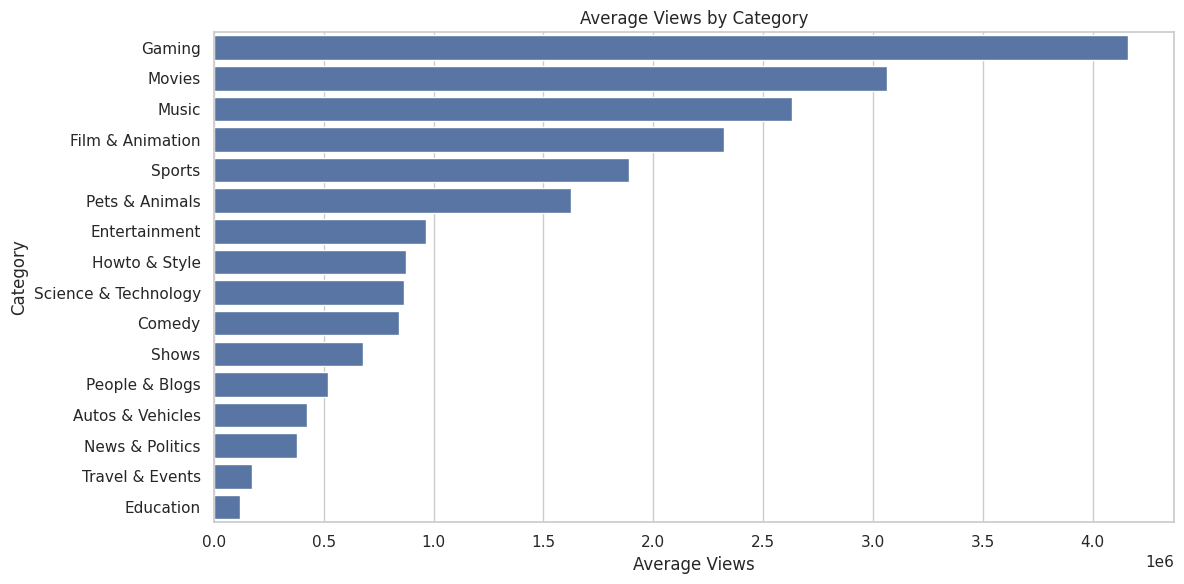

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Barplot of average views by category...")

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='views',
    y='category_name',
    estimator='mean',
    errorbar=None,
    order=df.groupby('category_name')['views'].mean().sort_values(ascending=False).index
)
plt.title('Average Views by Category')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


📈 Daily upload trend over time...


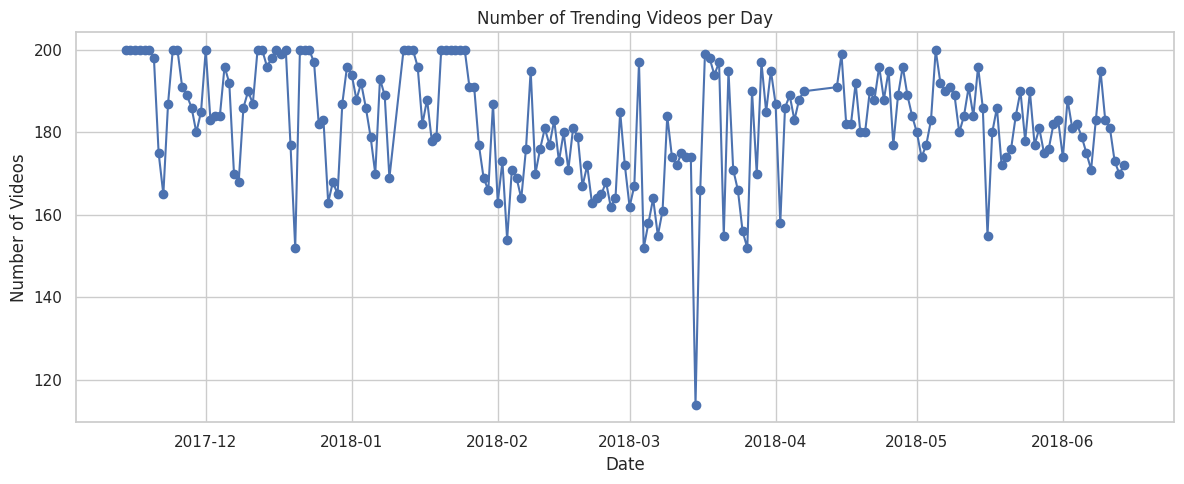

In [59]:
print("📈 Daily upload trend over time...")

daily_uploads = df.groupby(df['trending_date'].dt.date)['video_id'].count()

plt.figure(figsize=(12,5))
daily_uploads.plot(marker='o')
plt.title('Number of Trending Videos per Day')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.tight_layout()
plt.show()


📺 Top 10 channels by number of trending videos...


<ipython-input-58-90a60ce22a75>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_channels.index, x=top_channels.values, palette='magma')


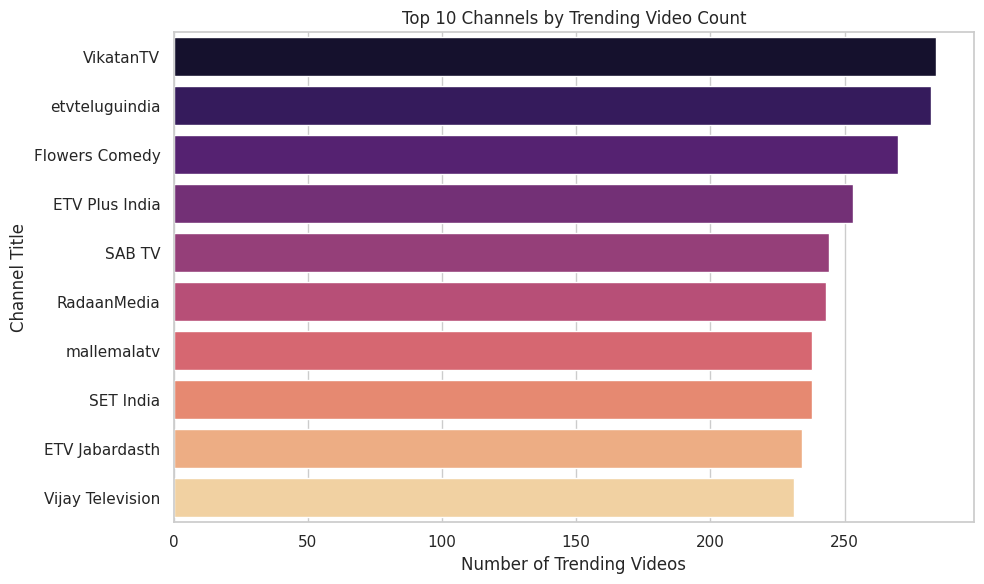

In [58]:
print("📺 Top 10 channels by number of trending videos...")

top_channels = df['channel_title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_channels.index, x=top_channels.values, palette='magma')
plt.title('Top 10 Channels by Trending Video Count')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Title')
plt.tight_layout()
plt.show()
